<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/04_a_Gentle_Introduction_to_Keras_Simple_neural_network(mlp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 188 (delta 47), reused 34 (delta 11), pack-reused 89
Receiving objects: 100% (188/188), 14.70 MiB | 6.03 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/SRU-deeplearning-workshop


In [2]:
%matplotlib inline

## Dataset


```
# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('./dataset/Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])

    return X_train, y_train, X_test, y_test
```



In [3]:
# tensorflow v2.x > support NVIDIA
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np

from dataset import load_hoda

In [4]:
np.random.seed(123)  # for reproducibility

In [5]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()


In [6]:
'''
in keras the input must obey some rules:
1. input must be np array not list
2. accepts float32 bit not int 
3. all the inputs are better to be normalized
4. labels must be one hotted
'''

'\nin keras the input must obey some rules:\n1. input must be np array not list\n2. accepts float32 bit not int \n3. all the inputs are better to be normalized\n4. labels must be one hotted\n'

In [7]:
x_train_original.shape, y_train_original.shape

((1000, 25), (1000,))

In [8]:
# for one hotted the numbers
# for one hot the strings we use the sklearn > one_hot = pd.get_dummies(df, columns = ['xxx'])
keras.utils.to_categorical(y_train_original, num_classes=10)[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
keras.utils.to_categorical(y_train_original, num_classes=10).shape

(1000, 10)

In [10]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [11]:
# Preprocess input data for Keras. 

# the np.array make it mutable
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [12]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
x_train.dtype, x_train.min(), x_train.max()

(dtype('uint8'), 0, 255)

In [14]:
# for normalization it must be float > we have divisions
# 0-255 >> 0-1 >> /255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
x_train.min(), x_train.max(), x_train.mean(), x_train.std()

(0.0, 1.0, 0.40205175, 0.45745108)

## Model Architecture

In [16]:
model = Sequential()
# relu is good for hidden layers 
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()
# 1664 = 25*64 + 1*64(bias) 
# 650 = 64*10 + 1*10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
# 3 main splits > train, validation, test
# calculate the loss and acc on val data
# the weights are updated based on the train dataset
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)

Epoch 1/30
13/13 [==============================] - 2s 70ms/step - loss: 2.1383 - accuracy: 0.3088 - val_loss: 1.9842 - val_accuracy: 0.4850
Epoch 2/30
13/13 [==============================] - 0s 28ms/step - loss: 1.9387 - accuracy: 0.4963 - val_loss: 1.8209 - val_accuracy: 0.6200
Epoch 3/30
13/13 [==============================] - 0s 14ms/step - loss: 1.7794 - accuracy: 0.6162 - val_loss: 1.6705 - val_accuracy: 0.6550
Epoch 4/30
13/13 [==============================] - 0s 25ms/step - loss: 1.6258 - accuracy: 0.6837 - val_loss: 1.5234 - val_accuracy: 0.7050
Epoch 5/30
13/13 [==============================] - 0s 16ms/step - loss: 1.4769 - accuracy: 0.7262 - val_loss: 1.3799 - val_accuracy: 0.7400
Epoch 6/30
13/13 [==============================] - 0s 21ms/step - loss: 1.3379 - accuracy: 0.7513 - val_loss: 1.2544 - val_accuracy: 0.7700
Epoch 7/30
13/13 [==============================] - 0s 22ms/step - loss: 1.2071 - accuracy: 0.7713 - val_loss: 1.1338 - val_accuracy: 0.7850
Epoch 8/30
13

## Model Evaluation

In [20]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 8ms/step - loss: 0.3621 - accuracy: 0.8900

Testing loss: 0.36, acc: 0.89%


## Predicting


In [21]:
predicted = model.predict(x_test)
predicted

7/7 [==============================] - 0s 5ms/step


array([[2.52323179e-03, 2.15752138e-04, 1.34390627e-03, ...,
        9.89155054e-01, 6.92396770e-06, 1.13949020e-04],
       [4.40722652e-04, 7.95874221e-04, 6.31557524e-01, ...,
        8.70809890e-03, 1.52638298e-04, 5.54935868e-05],
       [6.08460745e-03, 5.54871163e-04, 1.69473976e-01, ...,
        4.41863015e-02, 4.16146620e-04, 1.53233402e-03],
       ...,
       [1.22019984e-01, 3.79961431e-02, 1.21645946e-02, ...,
        1.41453594e-02, 1.59197599e-02, 1.11967519e-01],
       [1.06720348e-04, 6.22379454e-03, 1.91409228e-04, ...,
        2.61288020e-04, 2.00182945e-03, 8.45196664e-01],
       [1.64099934e-03, 4.09028980e-05, 2.06168952e-05, ...,
        2.06628669e-04, 7.11576373e-04, 5.99336490e-05]], dtype=float32)

In [22]:
print(predicted.shape)
predicted_classes=np.argmax(predicted,axis=1)
print(predicted_classes.shape)

(200, 10)
(200,)


In [23]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 8 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 2 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 7 9 8 2 9 8 8 6 6 6 7 6 2 4 6 4 4 5 9 1
 8 4 0 5 6 2 4 3 2 7 7 7 7 0 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 8 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 2 4 4 9 3 2 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 3 5 7 4 1 3 3 1
 1 4 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


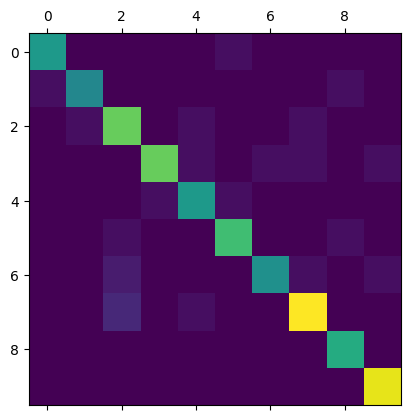

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_original, predicted_classes)

# plt.matshow(cm) / plt.imshow(cm)
plt.matshow(cm)
plt.show()

<Axes: >

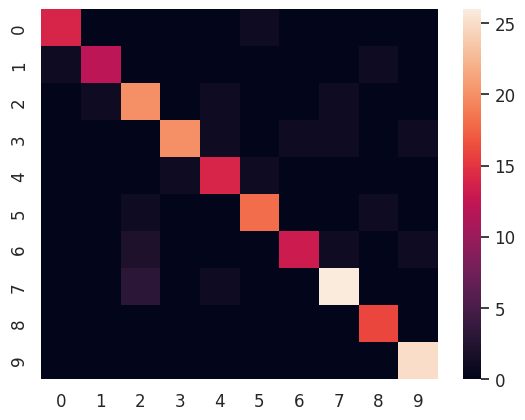

In [28]:
# matplotlib doesn't have heatmap and instead it has imshow
%matplotlib inline
! pip install --quiet seaborn
import seaborn as sns

sns.heatmap(cm)

<Axes: >

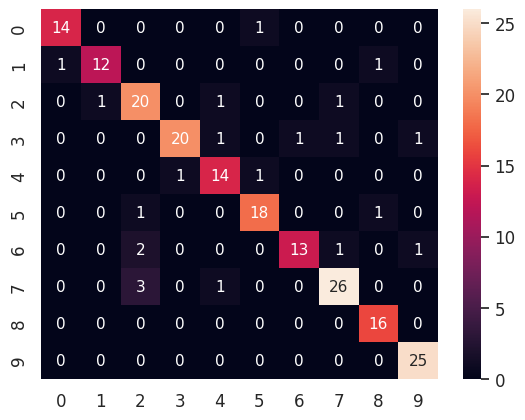

In [26]:
sns.set(font_scale=1.1) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 11}) # font size

## Complete Code

In [27]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 7. Fit model on training data
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64)

# 8. Evaluate model on test data
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

Epoch 1/30
16/16 [==============================] - 1s 3ms/step - loss: 2.1842 - accuracy: 0.1850
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 1.9712 - accuracy: 0.3800
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.7908 - accuracy: 0.5890
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 1.6146 - accuracy: 0.6800
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.4404 - accuracy: 0.7370
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 1.2808 - accuracy: 0.7640
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.1365 - accuracy: 0.7770
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0116 - accuracy: 0.7980
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9042 - accuracy: 0.8200
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8125 - accuracy: 0.8250
Epoch 11/30
16/16 [